[Indice](index.ipynb) | Previo: [FormalismoLagrangiano.MecanicaCeleste.ProblemaNCuerpos](09.06.00.00.FormalismoLagrangiano.MecanicaCeleste.ProblemaNCuerpos.ipynb) | Siguiente: [FormalismoLagrangiano.MecanicaCeleste.Problema2Cuerpos.EcuacionRadial](09.06.00.01.FormalismoLagrangiano.MecanicaCeleste.Problema2Cuerpos.EcuacionRadial.ipynb)

### 9.8.4. El problema general de los dos cuerpos
<a id='doscuerpos_general'></a>

En la sección anterior probamos, partiendo del lagrangiano del problema de los N-cuerpos y mediante un conjunto de transformaciones de coordenadas, además de la aplicación del procedimiento de Routh, que en el plano invariante de Laplace, el problema gravitacional de los dos cuerpos tiene dos grados de libertad $r,\theta$ y el Lagrangiano general se escribe:

$$
L_\mathrm{2B}=\frac{1}{2}m_r\left(\dot r^2+\frac{L_r^2}{m_r^2 r^2}\right)-U(r)
$$
donde $L_r=m_r r^2 \dot \theta$ y $U(r)=-G M m_r/r$ 

Pero ¿es este resultado exclusivo de la interacción gravitacional o puede extenderse a otras interacciones?.  Si revisamos el procedimiento y los argumentos utilizados a lo largo de las secciones anteriores, notaremos una propiedad bastante notable: ninguna de las simetrías y cantidades conservadas encontradas para el Lagrangiano de los N cuerpos o para el más restringido problema de los dos cuerpos que interactúan gravitacionalmente, depende en realidad de la forma funcional específica de la función de energía potencial $U(r)$.  Esto contrasta abiertamente con los procedimientos que usamos en el formalismo vectorial para encontrar las cuadraturas a través de manipulaciones de la ecuación de movimiento. 

La única suposición de fondo que hemos hecho hasta aquí es que la función de energía potencial solamente dependa de las distancia (la magnitud de los vectores posición) entre las partículas.  En el lagrangiano reducido de los dos cuerpos (Ec. [lagrangiano_doscuerpos](#mjx-eqn-eq%3Alagrangiano_doscuerpos)), esta suposición implica que la función de energía potencial solo depende de la distancia al origen de coordenadas. La fuerza generalizada asociada con un potencial como este será:

$$
\vec F = -\frac{\partial U}{\partial r}\hat e_r
$$
que apunta en dirección al origen de coordenadas (centro), aunque puede ir en sentido de ese mismo origen (fuerza atractiva) o en sentido contrario, fuerza repulsiva. 

Esto implica que el Lagrangiano que escribimos en la Ec. ([legrangiano_doscuerpos_reducido](#mjx-eqn-eq%3Alegrangiano_doscuerpos_reducido)) aplica en realidad a cualquier problema de **fuerzas centrales**, sea este gravitacional, eléctrico e incluso producto de la interacción con un espacio-tiempo curvo.  Es esta la razón por la que hablaremos aquí, y en el contexto del formalismo escalar de la mecánica, de un **problema de los dos cuerpos general**, en lugar de restringirnos al problema de los dos cuerpos de la mecánica celeste.

### 9.8.5. El potencial efectivo y las regiones de exclusión
<a id='potencial_efectivo'></a>

El Lagrangiano reducido de los dos cuerpos cumple todas las condiciones del Teorema de conservación de la energía, y por tanto la función de Jacobi asociada con él:

$$
h = \frac{\partial L_\mathrm{2B}}{\partial \dot r}\dot r-L_\mathrm{2B}=\frac{1}{2}m_r\dot r^2+\frac{1}{2}\frac{L_r^2}{m_r r^2}+U(r)
$$
es una cuadratura del sistema.  Al valor constante de esta cuadratura lo llamaremos $E_r$.

Si dividimos $h$ por $m_r$ y llamamos 

$$
\begin{array}{rcl}
\epsilon & \equiv & E_r/m_r\\ 
h & \equiv & L_r/m_r\\
V(r) & \equiv & U(r)/m_r
\end{array}
$$
o energía reducida específica, momento angular reducido específico y potencial, respectivamente, la cuadratura asociada a la función de Jacobi se puede escribir como:

$$
\epsilon = \frac{1}{2}\dot r^2+\frac{1}{2}\frac{h^2}{r^2}+V(r)
$$

Despejando $\dot r^2$ en función de las constantes $\epsilon$ y $h$ obtenemos:

$$
\frac{1}{2}\dot r^2 = \epsilon-\left[V(r)+\frac{1}{2}\frac{h^2}{r^2}\right]
$$

o bien
\begin{equation}
\label{eq:fcentral_regiones_exclusion}
\dot r^2 = 2[\epsilon-V_\mathrm{eff}(r)]
\end{equation}
donde hemos definido 

$$V_\mathrm{eff}(r)\equiv V(r)+\frac{h^2}{2r^2}$$
que llamaremos en lo sucesivo el **potencial efectivo**.

Nótese que el potencial efectivo, que puede considerarse como la fuente de la que deriva la fuerza radial que sufre la partícula, se puede descomponer como la suma del potencial convencional $V(r)$ y un potencial adicional $V_{\rm cen}=h^2/(2r^2)$ que llamaremos en lo sucesivo el **potencial centrífugo**.

La Ec. ([fcentral_regiones_exclusion](#mjx-eqn-eq%3Afcentral_regiones_exclusion)) tiene una estructura similar a la ecuación que nos permitió definir las regiones de exclusión en el problema circular restringidos de los 3 cuerpos (ver [Sección *Las regiones de exclusión*](08.03.00.00.Problema3Cuerpos.RegionesExclusion.ipynb#crtbp_regiones_exclusion)).  Pero no es de extrañar; esta ecuación tiene origen en una cantidad conservada análoga a la constante de Jacobi.

Para entender cómo "funcionan" las regiones de exclusión en este caso, hagamos un gráfico del potencial efectivo en el problema restringido de los dos cuerpos en el caso general de un potencial con la forma funcional $V(r)=-\mu/r^n$, siendo $\mu$ una constante (que no debe ser confundida en general con el parámetro gravitacional) y $n$ un número real. Naturalmente, el potencial gravitacional newtoniano es un caso particular de este potencial para el cuál $\mu$ es la constante gravitacional del sistema y $n=1$.

Para ello implementemos primero los potenciales (de fuerza, centrífugo y efectivo) como rutinas:

<a id='code:V_doscuerpos'></a>

In [39]:
def Vfuerza(r,**parametros):
    V=-parametros["mu"]/r**parametros["n"]
    return V

def Vcen(r,**parametros):
    V=parametros["h"]**2/(2*r**2)
    return V

def Veff(r,Vf,**parametros):
    V=Vf(r,**parametros)+Vcen(r,**parametros)
    return V

Aquí por comodidad hemos "empacado" en el argumento `**parametros` todas las cantidades constantes, $n$, $\mu$ y $h$ de las que dependen los potenciales. Una gráfica del potencial efectivo, para valores característicos de los parámetros, se puede obtener con este algoritmo:

In [40]:
%matplotlib nbagg

<a id='code:potencial_efectivo'></a>

<IPython.core.display.Javascript object>


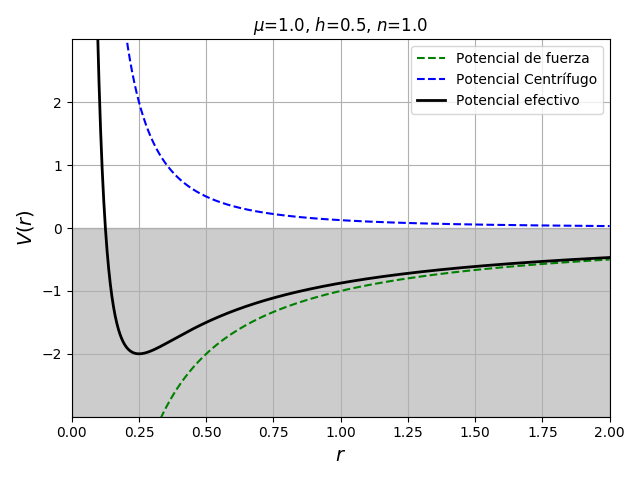

In [74]:
#Parámetros del potencial
mu=1.0
n=1.0
h=0.5

#Puntos en los que calculamos el potencial
rmax=2
from numpy import linspace
rs=linspace(1e-3,rmax,1000)

#Valores del potencial
Vs=Vfuerza(rs,mu=mu,n=n)
Vcens=Vcen(rs,h=h)
Veffs=Veff(rs,Vfuerza,h=h,mu=mu,n=n)

#Valores mínimo y máximo para el gráfico
Vmin=-1.5*abs(Veffs.min())
Vmax=+1.5*abs(Veffs.min())

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(rs,Vs,'g--',label='Potencial de fuerza')
ax.plot(rs,Vcens,'b--',label='Potencial Centrífugo')
ax.plot(rs,Veffs,'k-',lw=2,label="Potencial efectivo")

#Decoracion
ax.axhspan(Vmin,0,color='k',alpha=0.2)
ax.set_xlim((0,rmax))
ax.set_ylim((Vmin,Vmax))
ax.set_xlabel(r"$r$",fontsize=14)
ax.set_ylabel(r"$V(r)$",fontsize=14)
ax.set_title(f"$\mu$={mu}, $h$={h}, $n$={n}")
ax.legend()
ax.grid()
fig.tight_layout();
fig.savefig("./figures/raw/potencial_efectivo.png")

<a id='code:potencial_efectivo'></a><center><b>Figura 9.155.</b> </center>

Para ver esta una versión interactiva de esta figura por favor use las libretas disponibles en la [versión electrónica del libro](http://github.com/seap-udea/MecanicaCeleste-Zuluaga).

Use la figura interactiva a continuación para entender el efecto que distintos valores de los parámetros del potencial tienen a la hora de determinar su forma.

In [67]:
def potencial_doscuerpos(mu=1.0,h=1.0,n=1.0):
    #Puntos en los que calculamos el potencial
    rmax=5
    from numpy import linspace
    rs=linspace(1e-3,rmax,1000)
    Vs=Vfuerza(rs,mu=mu,n=n)
    Vcens=Vcen(rs,h=h)
    Veffs=Veff(rs,Vfuerza,h=h,mu=mu,n=n)
    Vmin=-3.5*abs(Veffs.min())
    Vmax=+2.5*abs(Veffs.min())

    #Gráfico
    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.gca()
    ax.plot(rs,Vs,'g--',label='Potencial de fuerza')
    ax.plot(rs,Vcens,'b--',label='Potencial Centrífugo')
    ax.plot(rs,Veffs,'k-',lw=2,label="Potencial efectivo")
    ax.axhspan(Vmin,0,color='k',alpha=0.2)
    ax.set_xlim((0,rmax))
    ax.set_ylim((Vmin,Vmax))
    ax.set_xlabel(r"$r$")
    ax.set_ylabel(r"$V(r)$")
    ax.set_title(f"$\mu$={mu}, $h$={h}, $n$={n}")
    ax.legend()
    ax.grid()
    fig.tight_layout()    
   
# Widgets de Jupyter
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)

from ipywidgets import interact,fixed,widgets
interact(potencial_doscuerpos,
         mu=widgets.FloatSlider(min=0.1,max=2.0,step=0.1,value=1.0,**opciones),
         h=widgets.FloatSlider(min=0.1,max=2.0,step=0.1,value=1.0,**opciones),
         n=widgets.FloatSlider(min=-2.0,max=2.0,step=0.1,value=1.0,**opciones),
        );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='mu', max=2.0, min=0.1), Flo…

<a id='fig:09.06.00.00.FormalismoLagrangiano.MecanicaCeleste.Problema2Cuerpos_156'></a><center><b>Figura 9.156.</b> </center>

--end:hide_pdf,hide_html--

Como vemos en la Figura ([code:potencial_efectivo](#fig:code:potencial_efectivo)) el potencial efectivo gravitacional (es decir con $n=1$), tiene varias características:

1. Cerca al origen $r\rightarrow 0$ el valor del potencial crece hasta valores positivos muy grandes.  Esta es una característica típica de un potencial repulsivo.  Este crecimiento obedece a la dependencia del potencial centrífugo del inverso del cuadrado de la distancia $V_\mathrm{cen}\sim 1/r^2$.  Esta dependencia es más fuerte que la dependencia del inverso de la distancia $V_\mathrm{grav}\sim -1/r$ del potencial gravitacional.

2. Lejos del origen el potencial efectivo se vuelve negativo (potencial atractivo).  En general si $n>0$, el potencial tiende a cero cuando $r\rightarrow\infty$.  Esto es debido a la dependencia $V\sim -1/r^n$ que, para al menos para los casos en los que $n<2$, es una caída más lenta que la caida proporcional a $1/r^2$ del potencial centrífugo.

3. El hecho de que el potencial gravitacional y el potencial centrífugo tengan signos diferentes y caigan a ritmos diferentes, hace que el potencial efectivo tenga un valor mínimo a una distancia finita $r=r_\mathrm{min}$ del origen.

Pero ¿cuáles son las regiones de exclusión? ¿qué significado tiene la distancia $r_\mathrm{min}$? 

Las condiciones iniciales de la partícula en el problema restringido de los dos cuerpos que venimos estudiando en esta sección, determinan el valor de $h$, que a su vez fija la forma (abstracta) del potencial efectivo.  Pero esas mismas condiciones iniciales determinan un valor de la energía reducida específica $\epsilon$.  Esta cantidad tiene las mismas unidades que $V_\mathrm{eff}$ y puede representarse en figuras como la Figura ([code:potencial_efectivo](#fig:code:potencial_efectivo)).  En la Figura ([regiones_exclusion_potencial_efectivo](#fig:regiones_exclusion_potencial_efectivo)) se representan 3 situaciones en las que las condiciones iniciales determinan el mismo valor de $h$ pero distintos valores de $\epsilon$.

<a id='fig:regiones_exclusion_potencial_efectivo'></a>![Regiones de exclusión y regiones permitidas en un problema de fuerzas centrales++t!++0.6++\label{fig:regiones_exclusion_potencial_efectivo}](./figures/horizontal_regiones_exclusion_potencial_efectivo.png)

<center><b>Figura 9.157</b>. Regiones de exclusión y regiones permitidas en un problema de fuerzas centrales</center>

De acuerdo con la Ec. ([fcentral_regiones_exclusion](#mjx-eqn-eq%3Afcentral_regiones_exclusion)) la partícula *no* podrá encontrarse en ningún lugar en el cual se cumpla la condición:

$$
\epsilon-V_{\rm eff}(r)<0
$$

De hacerlo, el valor del cudrado de la velocidad sería negativo.

Independientemente de si sabemos cómo se mueve o no la partícula (de si tenemos o no una solución a las ecuaciones de movimiento) podemos decir a qué distancias del origen *no* estará.  O al contrario: podemos delimitar claramente los valores de la coordenada radial que sí visitará.  En la Figura ([regiones_exclusion_potencial_efectivo](#fig:regiones_exclusion_potencial_efectivo)) podemos reconocer 3 casos especiales, que si bien han sido calculados aquí para el caso gravitacional ($n=1$), pueden extenderse a situaciones en las que $0<n<2$:

1. Si $\epsilon>0$ la partícula puede acercarse al centro hasta una distancia mínimima, pero puede alejarse de él a una distancia arbitrariamente grante.  Esta situación es familiar, en el caso del potencial gravitacional newtoniano $n=1$, para las órbitas abiertas (parabólicas e hiperbólicas) donde la distancia mínima es la distancia al periapsis.  En el caso de potenciales distintos al gravitacional newtoniano, el resultado sigue siendo válido.

2. Si $\epsilon<0$ la partícula solo puede estar en un íntervalo de distancias y nunca más cerca de una distancia mínima o más lejos de una distancia máxima.  Esta condición corresponde al caso de una órbita elíptica cuando $n=1$; en este caso las distancias mínima y máxima no son otra cosa que las distancias al periapsis y al apoapsis, respectivamente.  Más interesante aún es descubrir que la misma condición aplica para valores de $n$ diferentes de 1, es decir incluso en el caso de fuerzas muy diferentes a la gravitacional, en la que las trayectorias no son necesariamente elipses, también habra una distancia mínima y una máxima (aunque no necesariamente esas distancias extremas ocurran en puntos individuales de la trayectoria.

3. Si $\epsilon=V_\mathrm{eff,min}$, donde está última cantidad corresponde al valor mínimo del potencial efectivo, la partícula solo puede estar a una distancia constante $r=r_\mathrm{min}$ del centro.  Esta condición equivale simplemente a decir que la partícula sigue una trayectoria circular de radio $r_\mathrm{min}$.  En este caso la "circularidad" de la trayectoria para este punto en particular es independiente del valor de $n$.  

Estos resultados tienen un nivel de generalidad muy amplio, que demuestra, una vez más las ventajas notables del formalismo escalar y en particular del formalismo Lagrangiano respecto del formalismo vectorial para tratar los problemas de la mecánica celeste.

[Indice](index.ipynb) | Previo: [FormalismoLagrangiano.MecanicaCeleste.ProblemaNCuerpos](09.06.00.00.FormalismoLagrangiano.MecanicaCeleste.ProblemaNCuerpos.ipynb) | Siguiente: [FormalismoLagrangiano.MecanicaCeleste.Problema2Cuerpos.EcuacionRadial](09.06.00.01.FormalismoLagrangiano.MecanicaCeleste.Problema2Cuerpos.EcuacionRadial.ipynb)